## Import Libraries

In [1]:
import pandas as pd # Pandas for data manipulations
import numpy as np  # Numpy for the computations
import os
from sklearn.metrics import accuracy_score,classification_report # For metrics
from sklearn.model_selection import train_test_split             # For train and test splits
from sklearn.model_selection import GridSearchCV                 # For GridSearch and K-fold cross validation
from sklearn.impute import SimpleImputer                         # For Imputation

import matplotlib.pyplot as plt # For visualizations
import seaborn as sns           # For visualizations

import warnings                   # For warnings
warnings.filterwarnings('ignore') # Supress/Ignore warnings

### Function for training the model

In [2]:
# Function for training the model
from sklearn.metrics import make_scorer
from sklearn.metrics import recall_score

def fn_train_model(model, 
                X_train, 
                y_train, 
                parameters = None, 
                k = 1):
    if parameters == None:
        model.fit(X_train, y_train) 
    else:
        model_cv = GridSearchCV(model, 
                                param_grid = parameters, 
                                cv = k)
        
        model_cv.fit(X_train, y_train)
        model = model_cv.best_estimator_
        
    return model

In [3]:
# Function to count the null values and their percentages in each column.
def fn_nulls_count(df):
    # Nulls counts in each column.
    nulls_counts = df.isnull().sum()
    # Convert above series into dataframe.
    nulls_counts_df = nulls_counts.to_frame(name = 'nulls_count')
    # Add a new column - to get the null counts percentage to the total rows.
    nulls_counts_df['nulls_percentage'] = round(100 * nulls_counts_df['nulls_count']/df.shape[0], 2)
    # Return the null counts dataframe.
    return nulls_counts_df

### # Function to generate classification metrics

In [4]:
# Function to generate classification metrics
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

def fn_compute_metrics(model,
                       model_name,
                       train_data, 
                       train_actuals,
                       test_data,
                       test_actuals):
    metrics = {}
    # train metrics
    train_predictions = model.predict(train_data)
    metrics['train_accuracy']    = accuracy_score(train_actuals, train_predictions)
    metrics['train_precision']   = precision_score(train_actuals, train_predictions)
    metrics['train_recall']      = recall_score(train_actuals, train_predictions)
    metrics['train_f1_score']    = f1_score(train_actuals, train_predictions)
    # test metrics
    test_predictions  = model.predict(test_data)
    metrics['test_accuracy']     = accuracy_score(test_actuals, test_predictions)
    metrics['test_precision']    = precision_score(test_actuals, test_predictions)
    metrics['test_recall']       = recall_score(test_actuals, test_predictions)
    metrics['test_f1_score']     = f1_score(test_actuals, test_predictions)
    
    return pd.Series(metrics, name = model_name)

In [5]:
# Function to generate classification metrics
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def fn_compute_metrics_train(model, 
                       data, 
                       actuals):
    
    predictions = model.predict(data)
    print('\nConfusion Matrix :')
    print(confusion_matrix(actuals, predictions) ) 
    
    print('\nReport : ')
    print(classification_report(actuals, predictions))
    
    fe_recall = recall_score(actuals, predictions, average = None)[0]
    print('Recall score :', fe_recall)
    
    return fe_recall

### Train/Validation data reading

In [95]:
folder="D:/Notes/TechGig/data"
os.listdir(folder)


['20200829_Batch81A_CSE7405o_ModuleEndSession (1)',
 '20200829_Batch81A_CSE7405o_ModuleEndSession (1).zip',
 'dfMetrics.xlsx',
 'dfMetrics_After2Removal.xlsx',
 'dfMetrics_After2RemovalV2.xlsx',
 'dfMetrics_After2RemovalV3.xlsx',
 'dfMetrics_After2RemovalV4.xlsx',
 'kmeans_cluster_centroids.csv',
 'Phising_Sample_Submisson.csv',
 'Phising_Testing_Dataset.csv',
 'Phising_Training_Dataset.csv',
 'ProblemStatement.pdf',
 'test_predictions_20thJunV1.csv',
 'test_predictions_20thJun_xbm.csv',
 'test_predictions_25thJulyV1.csv',
 'test_predictions_25thJulyV2.csv',
 'test_predictions_25thJulyV2_XGB.csv',
 'test_predictions_25thJulyV3.csv',
 'test_predictions_25thJulyV3_XgB.csv',
 'test_predictions_25thJulyV3_XGB_New.csv',
 'test_predictions_25thJulyV4_XgB.csv',
 '~$dfMetrics_After2Removal.xlsx',
 '~$dfMetrics_After2RemovalV2.xlsx']

In [96]:
sub = pd.read_csv(folder+u'//'+'sample_submission.csv')
#sub.index=df_train['key']
#df_train.drop('key', inplace=True, axis=1)
print(sub.shape)
sub.head()

FileNotFoundError: [Errno 2] No such file or directory: 'D:/Notes/TechGig/data//sample_submission.csv'

In [97]:
df_train = pd.read_csv(folder+u'//'+'Phising_Training_Dataset.csv')
df_train.index=df_train['key']
df_train.drop('key', inplace=True, axis=1)
print(df_train.shape)
df_train.head()

(8955, 31)


,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
key,,,,,,,,,,,,,,,,,,,,,
12344,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
12345,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
12346,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
12347,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
12348,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [98]:
df_test = pd.read_csv(folder+u'//'+'Phising_Testing_Dataset.csv')
df_test.index=df_test['key']
df_test.drop('key', inplace=True, axis=1)
print(df_test.shape)
df_test.head(2)

(2100, 30)


,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
key,,,,,,,,,,,,,,,,,,,,,
21338,1,1,1,1,1,1,-1,1,-1,1,...,1,1,1,1,1,1,1,-1,0,1
21339,1,-1,1,1,1,-1,0,-1,1,1,...,1,1,1,-1,-1,0,-1,-1,0,1


### Divide data into training and validation subsets

In [99]:
# Divide data into training and validation subsets
y = df_train['Result']
X = df_train.drop(['Result'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    train_size=0.8, 
                                                    test_size=0.2,
                                                    random_state=0)

In [101]:
# first neural network with keras tutorial
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [108]:
...
# define the keras model
model = Sequential()
model.add(Dense(12, input_shape=(30,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [109]:

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [110]:
model.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
717/717 [==============================] - 1s 730us/step - loss: -2.2957 - accuracy: 0.4239
Epoch 2/150
717/717 [==============================] - 1s 770us/step - loss: -56.2122 - accuracy: 0.3664
Epoch 3/150
717/717 [==============================] - 1s 735us/step - loss: -261.5593 - accuracy: 0.3636
Epoch 4/150
717/717 [==============================] - 1s 744us/step - loss: -691.4153 - accuracy: 0.3603
Epoch 5/150
717/717 [==============================] - 1s 739us/step - loss: -1380.8767 - accuracy: 0.3592
Epoch 6/150
717/717 [==============================] - 1s 724us/step - loss: -2354.8645 - accuracy: 0.3578
Epoch 7/150
717/717 [==============================] - 1s 791us/step - loss: -3626.8032 - accuracy: 0.3596
Epoch 8/150
717/717 [==============================] - 1s 766us/step - loss: -5228.9258 - accuracy: 0.3562
Epoch 9/150
717/717 [==============================] - 1s 756us/step - loss: -7189.9316 - accuracy: 0.3559
Epoch 10/150
717/717 [======================

In [113]:

# evaluate the keras model
_, accuracy = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

224/224 [==============================] - 0s 624us/step - loss: -14530214.0000 - accuracy: 0.3544
Accuracy: 35.44


In [116]:
...
# make probability predictions with the model
predictions = model.predict(X_train)
# round predictions 
rounded = [round(x[0]) for x in predictions]
...
# make class predictions with the model
predictions = (model.predict(X) > 0.5).astype(int)
predictions

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [122]:
...
# make class predictions with the model
predictions = (model.predict(X) > 0.5).astype(int)
len(predictions)

8955

In [120]:
for i in range(5):
	print('%s => %d (expected %d)' % (X_train[i].tolist(), predictions[i], y[i]))

KeyError: 0

In [11]:
y_train = y_train.astype('category')
y_test = y_test.astype('category')

In [12]:
print('X_train dimensions: ', X_train.shape)
print('y_train dimensions: ', y_train.shape)
print('X_test dimensions:  ', X_test.shape)
print('y_test dimensions:  ', y_test.shape)

X_train dimensions:  (7164, 30)
y_train dimensions:  (7164,)
X_test dimensions:   (1791, 30)
y_test dimensions:   (1791,)


 1    5034
-1    3921
Name: Result, dtype: int64

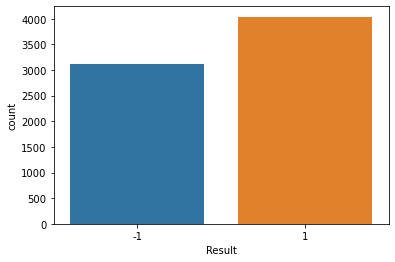

In [13]:
plot_data = y_train.to_frame()
sns.countplot(x = 'Result', data=plot_data)
df_train.Result.value_counts()

# RandomForestClassifier

In [14]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_jobs = -1,
                             random_state = 1)
# Function for training the model
from sklearn.metrics import make_scorer

def fn_train_model(model, 
                X_train, 
                y_train, 
                parameters = None, 
                k = 1):
    if parameters == None:
        model.fit(X_train, y_train) 
    else:
        model_cv = GridSearchCV(model, 
                                param_grid = parameters, 
                                cv = k,
                                scoring = make_scorer(
                                    lambda yt,yp: f1_score(yt,yp,pos_label = 1)))
        model_cv.fit(X_train, y_train)
        model = model_cv.best_estimator_
        
    return model

In [15]:
base_model = fn_train_model(rfc, 
                            X_train,
                            y_train)

In [16]:
base_model_metrics = fn_compute_metrics(base_model,
                                        'base_model',
                                        X_train,
                                        y_train,
                                        X_test,
                                        y_test)

In [17]:
base_model_metrics

train_accuracy     0.989671
train_precision    0.988664
train_recall       0.993069
train_f1_score     0.990862
test_accuracy      0.970408
test_precision     0.964462
test_recall        0.982897
test_f1_score      0.973592
Name: base_model, dtype: float64

In [18]:
parameters = {"n_estimators" : [100, 150, 200]}

cv_model_1 = fn_train_model(rfc,
                          X_train,
                          y_train,
                          parameters,
                          k = 10)


cv_model_1_metrics = fn_compute_metrics(cv_model_1,
                                      'parameters_1',
                                       X_train,
                                       y_train,
                                        X_test,
                                       y_test)

print(cv_model_1)
print(cv_model_1_metrics)

RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=1)
train_accuracy     0.989671
train_precision    0.988664
train_recall       0.993069
train_f1_score     0.990862
test_accuracy      0.971524
test_precision     0.966370
test_recall        0.982897
test_f1_score      0.974564
Name: parameters_1, dtype: float64


In [123]:
%%time
parameters = {
    "n_estimators" : [150],
    "min_samples_leaf" : [3, 5, 10]}

cv_model_2 = fn_train_model(rfc,
                          X_train,
                          y_train,
                          parameters, k = 10)


cv_model_2_metrics = fn_compute_metrics(cv_model_2,
                                      'parameters_2',
                                       X_train,
                                       y_train,
                                       X_test,
                                       y_test)

print(cv_model_2)
print(cv_model_2_metrics)

RandomForestClassifier(min_samples_leaf=3, n_estimators=150, n_jobs=-1,
                       random_state=1)
train_accuracy     0.969012
train_precision    0.966292
train_recall       0.979208
train_f1_score     0.972707
test_accuracy      0.954774
test_precision     0.949754
test_recall        0.969819
test_f1_score      0.959681
Name: parameters_2, dtype: float64
Wall time: 20.4 s


In [124]:
parameters = {
    "n_estimators" : [150],
    "min_samples_leaf" : [3],
    "max_features": [0.5],
    "class_weight" : ['balanced_subsample']}

final_rfc_model = fn_train_model(rfc,
                          X_train,
                          y_train,
                          parameters, k = 10)


final_rfc_model_metrics = fn_compute_metrics(final_rfc_model,
                                      'Final_rfc_model',
                                       X_train,
                                       y_train,
                                       X_test,
                                       y_test)

print(final_rfc_model)
print(final_rfc_model_metrics)

RandomForestClassifier(class_weight='balanced_subsample', max_features=0.5,
                       min_samples_leaf=3, n_estimators=150, n_jobs=-1,
                       random_state=1)
train_accuracy     0.975851
train_precision    0.980611
train_recall       0.976485
train_f1_score     0.978544
test_accuracy      0.950865
test_precision     0.955734
test_recall        0.955734
test_f1_score      0.955734
Name: Final_rfc_model, dtype: float64


In [125]:
final_rfc_model.feature_importances_

array([0.00718812, 0.00638379, 0.00248256, 0.00125681, 0.00172631,
       0.03057312, 0.04408097, 0.4607394 , 0.00879827, 0.00216273,
       0.00053715, 0.00237849, 0.01002886, 0.24490537, 0.03535156,
       0.01246146, 0.00360458, 0.0013561 , 0.00216203, 0.00130535,
       0.00079821, 0.00220618, 0.00104583, 0.01046588, 0.00743662,
       0.07115041, 0.00528351, 0.00566361, 0.01485073, 0.00161599])

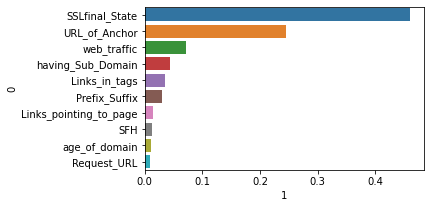

In [159]:
feature_names = list(X_train.columns)
plt.figure(figsize=(5,3))
d = pd.DataFrame([feature_names,final_rfc_model.feature_importances_]).T
d = d.sort_values([1],ascending=False)[0:10]
sns.barplot(d[1],d[0])
plt.

In [146]:
pd.set_option('precision', 2)

In [148]:
d.columns=["variable", "percantage (%)"]
#d["percantage"] = d["percantage"] * 100
d

,variable,percantage (%)
7,SSLfinal_State,46.07
13,URL_of_Anchor,24.49
25,web_traffic,7.12
6,having_Sub_Domain,4.41
14,Links_in_tags,3.54
5,Prefix_Suffix,3.06
28,Links_pointing_to_page,1.49
15,SFH,1.25
23,age_of_domain,1.05
12,Request_URL,1.0


# LogisticRegression

In [25]:
from sklearn.linear_model import LogisticRegression

lrc = LogisticRegression(penalty='l2',
                         class_weight="balanced",
                         random_state=1,
                         n_jobs=-1)

final_lrc_model = fn_train_model(rfc,
                          X_train,
                          y_train)


final_lrc_model_metrics = fn_compute_metrics(final_lrc_model,
                                      'Final_lrc_model',
                                       X_train,
                                       y_train,
                                       X_test,
                                       y_test)

print(final_lrc_model)
print(final_lrc_model_metrics)

RandomForestClassifier(n_jobs=-1, random_state=1)
train_accuracy     0.989671
train_precision    0.988664
train_recall       0.993069
train_f1_score     0.990862
test_accuracy      0.970408
test_precision     0.964462
test_recall        0.982897
test_f1_score      0.973592
Name: Final_lrc_model, dtype: float64


# DecisionTreeClassifier

In [26]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

final_dtc_model = fn_train_model(dtc,
                          X_train,
                          y_train)


final_dtc_model_metrics = fn_compute_metrics(final_dtc_model,
                                      'Final_dtc_model',
                                       X_train,
                                       y_train,
                                       X_test,
                                       y_test)

print(final_dtc_model)
print(final_dtc_model_metrics)

DecisionTreeClassifier()
train_accuracy     0.989671
train_precision    0.991815
train_recall       0.989851
train_f1_score     0.990833
test_accuracy      0.959241
test_precision     0.962814
test_recall        0.963783
test_f1_score      0.963298
Name: Final_dtc_model, dtype: float64


In [31]:
# Function to return predictions
def fn_return_predictions(model, data):
    predictions = model.predict(data)
    return predictions

In [33]:
Final_X_test=X_test
test_pred_rfc = fn_return_predictions(final_rfc_model, Final_X_test)
test_pred_dtc = fn_return_predictions(final_dtc_model, Final_X_test)
test_pred_lrc = fn_return_predictions(final_lrc_model, Final_X_test)
len(test_pred_rfc), len(test_pred_dtc), len(test_pred_lrc)

(1791, 1791, 1791)

In [34]:
# Create stack of predictions
stack = np.array([test_pred_rfc,
                  test_pred_dtc,
                  test_pred_lrc]).T

# Predictions
stacked_pred = mode(stack, axis=1)[0]

In [35]:
accuracy_score(y_test, stacked_pred)


0.9676158570630933

In [23]:
X_train_all = pd.concat([X_train, X_test])
y_train_all = pd.concat([y_train, y_test])

print(X_train_all.shape, y_train_all.shape)

(8955, 30) (8955,)


In [24]:
y_train_all = y_train_all.astype('category')


# Gradient Boosting Machines model.

In [37]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(n_estimators=10,
                                 learning_rate=1,
                                 max_depth = 2,
                                 warm_start = True,
                                 random_state=2345)

In [38]:
%%time
from sklearn.model_selection import GridSearchCV

parameters = { 'learning_rate':[0.8],
               'n_estimators':[10, 20],
               'max_depth':[2, 3],
               'warm_start': [True]
                }


gbm_cv_model = fn_train_model(gbm,
                          X_train_all,
                          y_train_all,
                          parameters,
                          k = 5)
print(gbm_cv_model)

GradientBoostingClassifier(learning_rate=0.8, n_estimators=20,
                           random_state=2345, warm_start=True)
Wall time: 4.57 s


In [39]:
final_model = fn_train_model(gbm,
                             X_train_all,
                             y_train_all)

In [40]:
fn_compute_metrics_train(gbm,
                             X_train_all,
                             y_train_all)


Confusion Matrix :
[[3595  326]
 [ 233 4801]]

Report : 
              precision    recall  f1-score   support

          -1       0.94      0.92      0.93      3921
           1       0.94      0.95      0.94      5034

    accuracy                           0.94      8955
   macro avg       0.94      0.94      0.94      8955
weighted avg       0.94      0.94      0.94      8955

Recall score : 0.9168579444019382


0.9168579444019382

# Adaptive Boosting model

In [149]:
from sklearn.ensemble import AdaBoostClassifier

adb = AdaBoostClassifier(n_estimators=200,
                         learning_rate=1)

In [42]:
%%time 
adb_base_model = fn_train_model(adb,
                             X_train_all,
                             y_train_all)

Wall time: 2.6 s


In [43]:
adb_base_train = fn_compute_metrics_train(adb_base_model, 
                             X_train_all,
                             y_train_all)


Confusion Matrix :
[[3584  337]
 [ 233 4801]]

Report : 
              precision    recall  f1-score   support

          -1       0.94      0.91      0.93      3921
           1       0.93      0.95      0.94      5034

    accuracy                           0.94      8955
   macro avg       0.94      0.93      0.94      8955
weighted avg       0.94      0.94      0.94      8955

Recall score : 0.9140525376179546


# Improve model
Tune the hyperparameters based on the recall using the class GridSearchCV available in sklearn.model_selection.
Use k-fold crossvalidation.

In [62]:
%%time
from sklearn.model_selection import GridSearchCV

parameters = { 'learning_rate':[0.1, 0.2, 0.3],
               'n_estimators':[100, 200, 300]}


adb_cv_model = fn_train_model(adb,
                             X_train_all,
                             y_train_all,
                          parameters,
                          k = 5)
print(adb_cv_model)

AdaBoostClassifier(learning_rate=0.3, n_estimators=300)
Wall time: 2min 3s


In [45]:
adb_cv_train = fn_compute_metrics_train(adb_cv_model, 
                             X_train_all,
                             y_train_all)


Confusion Matrix :
[[3585  336]
 [ 216 4818]]

Report : 
              precision    recall  f1-score   support

          -1       0.94      0.91      0.93      3921
           1       0.93      0.96      0.95      5034

    accuracy                           0.94      8955
   macro avg       0.94      0.94      0.94      8955
weighted avg       0.94      0.94      0.94      8955

Recall score : 0.9143075745983168


# Gradient Boosting Machines model.

In [46]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(n_estimators=10,
                                 learning_rate=1,
                                 max_depth = 2,
                                 warm_start = True,
                                 random_state=2345)

In [47]:
df_test

,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
key,,,,,,,,,,,,,,,,,,,,,
21338,1,1,1,1,1,1,-1,1,-1,1,...,1,1,1,1,1,1,1,-1,0,1
21339,1,-1,1,1,1,-1,0,-1,1,1,...,1,1,1,-1,-1,0,-1,-1,0,1
21340,1,-1,1,1,1,-1,0,0,-1,-1,...,-1,-1,-1,1,-1,1,-1,1,1,-1
21341,-1,-1,-1,1,-1,-1,-1,-1,1,-1,...,1,-1,-1,1,-1,1,-1,1,1,-1
21342,1,-1,1,1,1,-1,1,1,-1,1,...,1,1,1,1,1,1,-1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23433,-1,-1,-1,1,-1,-1,1,1,1,1,...,1,1,1,1,-1,1,-1,-1,1,1
23434,1,1,1,-1,1,-1,1,1,-1,-1,...,1,-1,1,-1,1,-1,1,1,1,1
23435,1,-1,1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,1,0,-1,1,0,1


In [48]:
%%time 
gbm_base_model = fn_train_model(gbm,
                             X_train_all,
                             y_train_all)

Wall time: 112 ms


In [49]:
gbm_base_train = fn_compute_metrics_train(gbm_base_model, 
                             X_train_all,
                             y_train_all)


Confusion Matrix :
[[3595  326]
 [ 233 4801]]

Report : 
              precision    recall  f1-score   support

          -1       0.94      0.92      0.93      3921
           1       0.94      0.95      0.94      5034

    accuracy                           0.94      8955
   macro avg       0.94      0.94      0.94      8955
weighted avg       0.94      0.94      0.94      8955

Recall score : 0.9168579444019382


In [69]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()

In [74]:
final_model = fn_train_model(xgb_model,
                             X_train_all,
                             y_train_all)

[23:17:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [75]:
xgb_cv_train  = fn_compute_metrics_train(xgb_model, 
                             X_train_all,
                             y_train_all)


Confusion Matrix :
[[3686  235]
 [ 148 4886]]

Report : 
              precision    recall  f1-score   support

          -1       0.96      0.94      0.95      3921
           1       0.95      0.97      0.96      5034

    accuracy                           0.96      8955
   macro avg       0.96      0.96      0.96      8955
weighted avg       0.96      0.96      0.96      8955

Recall score : 0.9400663096148941


In [80]:
%%time
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators = 15, random_state = 2)

final_model = fn_train_model(xgb_model,
                             X_train_all,
                             y_train_all)
xgb_cv_train  = fn_compute_metrics_train(xgb_model, 
                             X_train_all,
                             y_train_all)


Confusion Matrix :
[[3686  235]
 [ 148 4886]]

Report : 
              precision    recall  f1-score   support

          -1       0.96      0.94      0.95      3921
           1       0.95      0.97      0.96      5034

    accuracy                           0.96      8955
   macro avg       0.96      0.96      0.96      8955
weighted avg       0.96      0.96      0.96      8955

Recall score : 0.9400663096148941
Wall time: 267 ms


In [78]:
%%time
from xgboost import XGBClassifier

#xgb_model = XGBClassifier(n_estimators = 15, random_state = 2)
xgb_model = XGBClassifier(n_estimators = 500, 
                          early_stopping_rounds=5,
                          random_state = 2,
                          verbosity = 0)
final_model = fn_train_model(xgb_model,
                             X_train_all,
                             y_train_all)
xgb_cv_train  = fn_compute_metrics_train(xgb_model, 
                             X_train_all,
                             y_train_all)


Confusion Matrix :
[[3866   55]
 [  41 4993]]

Report : 
              precision    recall  f1-score   support

          -1       0.99      0.99      0.99      3921
           1       0.99      0.99      0.99      5034

    accuracy                           0.99      8955
   macro avg       0.99      0.99      0.99      8955
weighted avg       0.99      0.99      0.99      8955

Recall score : 0.9859729660800816
Wall time: 3.5 s


In [79]:
%%time
from xgboost import XGBClassifier

#xgb_model = XGBClassifier(n_estimators = 15, random_state = 2)

xgb_model = XGBClassifier(n_estimators = 500,
                          learning_rate = 0.05,
                          early_stopping_rounds=5,
                          n_jobs = 4,
                          random_state = 2,
                          verbosity = 0)
final_model = fn_train_model(xgb_model,
                             X_train_all,
                             y_train_all)
xgb_cv_train  = fn_compute_metrics_train(xgb_model, 
                             X_train_all,
                             y_train_all)


Confusion Matrix :
[[3828   93]
 [  83 4951]]

Report : 
              precision    recall  f1-score   support

          -1       0.98      0.98      0.98      3921
           1       0.98      0.98      0.98      5034

    accuracy                           0.98      8955
   macro avg       0.98      0.98      0.98      8955
weighted avg       0.98      0.98      0.98      8955

Recall score : 0.9762815608263198
Wall time: 5.09 s


In [83]:
%%time
from xgboost import XGBClassifier

xgb_model = XGBClassifier(early_stopping_rounds=5,
                          n_jobs = 4,
                          random_state = 2,
                          verbosity = 0)
from sklearn.model_selection import GridSearchCV

param_grid = {
    "model__n_estimators": [10, 50, 100, 500],
    "model__learning_rate": [0.05, 0.1, 0.5, 1],
}

searchCV = GridSearchCV(xgb_model, 
                        cv=5, 
                        param_grid=param_grid)

searchCV.fit(X_train_all, y_train_all) 

Wall time: 1min 10s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=5, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=4,
                                     num_parallel_tree=None, random_state=2,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None

In [84]:
searchCV.best_params_

{'model__learning_rate': 0.05, 'model__n_estimators': 10}


Confusion Matrix :
[[3828   93]
 [  83 4951]]

Report : 
              precision    recall  f1-score   support

          -1       0.98      0.98      0.98      3921
           1       0.98      0.98      0.98      5034

    accuracy                           0.98      8955
   macro avg       0.98      0.98      0.98      8955
weighted avg       0.98      0.98      0.98      8955

Recall score : 0.9762815608263198
Wall time: 4.83 s


# Improve the model¶
Improve the GBM model by tuning the hyperparameters.

In [63]:
%%time
from sklearn.model_selection import GridSearchCV

parameters = { 'learning_rate':[0.8],
               'n_estimators':[10, 20],
               'max_depth':[2, 3],
               'warm_start': [True]
                }


gbm_cv_model = fn_train_model(gbm,
                                X_train_all,
                             y_train_all,
                          parameters,
                          k = 5)
print(gbm_cv_model)

GradientBoostingClassifier(learning_rate=0.8, n_estimators=20,
                           random_state=2345, warm_start=True)
Wall time: 4.21 s


In [64]:
gbm_cv_train  = fn_compute_metrics_train(gbm_cv_model, 
                             X_train_all,
                             y_train_all)


Confusion Matrix :
[[3683  238]
 [ 164 4870]]

Report : 
              precision    recall  f1-score   support

          -1       0.96      0.94      0.95      3921
           1       0.95      0.97      0.96      5034

    accuracy                           0.96      8955
   macro avg       0.96      0.95      0.95      8955
weighted avg       0.96      0.96      0.96      8955

Recall score : 0.9393011986738077


In [28]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(n_estimators=20,
                                 learning_rate=0.8,
                                 max_depth = 3,
                                 random_state=2345,
                                 warm_start = True)

In [29]:
final_model = fn_train_model(gbm,
                             X_train_all,
                             y_train_all)

In [30]:
final_metrics  = fn_compute_metrics_train(gbm,
                             X_train_all,
                             y_train_all)


Confusion Matrix :
[[3683  238]
 [ 164 4870]]

Report : 
              precision    recall  f1-score   support

          -1       0.96      0.94      0.95      3921
           1       0.95      0.97      0.96      5034

    accuracy                           0.96      8955
   macro avg       0.96      0.95      0.95      8955
weighted avg       0.96      0.96      0.96      8955

Recall score : 0.9393011986738077


In [31]:
df_test = pd.read_csv(folder+u'//'+'Phising_Testing_Dataset.csv')
df_predict=df_test.copy()

df_predict.index=df_test['key']
df_predict.drop('key', inplace=True, axis=1)
print(df_predict.shape)
df_predict.head(2)

(2100, 30)


,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
key,,,,,,,,,,,,,,,,,,,,,
21338,1,1,1,1,1,1,-1,1,-1,1,...,1,1,1,1,1,1,1,-1,0,1
21339,1,-1,1,1,1,-1,0,-1,1,1,...,1,1,1,-1,-1,0,-1,-1,0,1


In [32]:
final_model

GradientBoostingClassifier(learning_rate=0.8, n_estimators=20,
                           random_state=2345, warm_start=True)

In [33]:
test_pred = final_model.predict(df_predict)

In [34]:
test_pred[0:10]

array([ 1, -1, -1, -1,  1,  1,  1,  1,  1, -1], dtype=int64)

In [35]:
submissions_df = pd.DataFrame({'key': df_test.key, 'Result': test_pred})
submissions_df.head()

,key,Result
0,21338,1
1,21339,-1
2,21340,-1
3,21341,-1
4,21342,1


In [36]:
submissions_df.to_csv(folder+u'//'+ "test_predictions_20thJunV1.csv", index=None)

In [37]:
folder

'D:/Notes/TechGig/data'

In [38]:
%%time
from xgboost import XGBClassifier

#xgb_model = XGBClassifier(n_estimators = 15, random_state = 2)
xgb_model = XGBClassifier(n_estimators = 500, 
                          early_stopping_rounds=5,
                          random_state = 2,
                          verbosity = 0)
final_model = fn_train_model(xgb_model,
                             X_train_all,
                             y_train_all)
xgb_cv_train  = fn_compute_metrics_train(xgb_model, 
                             X_train_all,
                             y_train_all)


Confusion Matrix :
[[3866   55]
 [  41 4993]]

Report : 
              precision    recall  f1-score   support

          -1       0.99      0.99      0.99      3921
           1       0.99      0.99      0.99      5034

    accuracy                           0.99      8955
   macro avg       0.99      0.99      0.99      8955
weighted avg       0.99      0.99      0.99      8955

Recall score : 0.9859729660800816
Wall time: 2.13 s


In [39]:
test_pred_xbm = final_model.predict(df_predict)
submissions_df_xbm = pd.DataFrame({'key': df_test.key, 'Result': test_pred_xbm})
submissions_df_xbm.head()

,key,Result
0,21338,1
1,21339,-1
2,21340,-1
3,21341,-1
4,21342,1


In [40]:
submissions_df_xbm.to_csv(folder+u'//'+ "test_predictions_20thJun_xbm.csv", index=None)

In [41]:
submissions_df_xbm

,key,Result
0,21338,1
1,21339,-1
2,21340,-1
3,21341,-1
4,21342,1
...,...,...
2095,23433,1
2096,23434,1
2097,23435,-1
2098,23436,1


,key,Result
0,21338,1
1,21339,-1
2,21340,-1
3,21341,-1
4,21342,1
...,...,...
2095,23433,1
2096,23434,1
2097,23435,-1
2098,23436,-1


In [61]:
df1=pd.read_csv(folder+u'//'+ "test_predictions_25thJulyV4_XgB.csv")
test_predictions  =df1['Result']
actual=submissions_df_xbm['Result']
print(actual.value_counts())
print(test_predictions.value_counts())
metrics={}
metrics['test_accuracy']     = round(accuracy_score(actual, test_predictions),4)
metrics['test_precision']    = round(precision_score(actual, test_predictions),4)
metrics['test_recall']       = round(recall_score(actual, test_predictions),4)
metrics['test_f1_score']     = round(f1_score(actual, test_predictions),4)
print(metrics)

 1    1128
-1     972
Name: Result, dtype: int64
 1    1112
-1     988
Name: Result, dtype: int64
{'test_accuracy': 0.9162, 'test_precision': 0.9281, 'test_recall': 0.9149, 'test_f1_score': 0.9214}


In [62]:
df1=pd.read_csv(folder+u'//'+ "test_predictions_25thJulyV3_XGB_New.csv")
test_predictions  =df1['Result']
actual=submissions_df_xbm['Result']
print(actual.value_counts())
print(test_predictions.value_counts())
metrics={}
metrics['test_accuracy']     = round(accuracy_score(actual, test_predictions),4)
metrics['test_precision']    = round(precision_score(actual, test_predictions),4)
metrics['test_recall']       = round(recall_score(actual, test_predictions),4)
metrics['test_f1_score']     = round(f1_score(actual, test_predictions),4)
print(metrics)

 1    1128
-1     972
Name: Result, dtype: int64
 1    1137
-1     963
Name: Result, dtype: int64
{'test_accuracy': 0.9281, 'test_precision': 0.9296, 'test_recall': 0.9371, 'test_f1_score': 0.9333}


In [63]:
df1=pd.read_csv(folder+u'//'+ "test_predictions_25thJulyV3_XgB.csv")
test_predictions  =df1['Result']
actual=submissions_df_xbm['Result']
print(actual.value_counts())
print(test_predictions.value_counts())
metrics={}
metrics['test_accuracy']     = round(accuracy_score(actual, test_predictions),4)
metrics['test_precision']    = round(precision_score(actual, test_predictions),4)
metrics['test_recall']       = round(recall_score(actual, test_predictions),4)
metrics['test_f1_score']     = round(f1_score(actual, test_predictions),4)
print(metrics)

 1    1128
-1     972
Name: Result, dtype: int64
 1    1107
-1     993
Name: Result, dtype: int64
{'test_accuracy': 0.9195, 'test_precision': 0.9332, 'test_recall': 0.9158, 'test_f1_score': 0.9244}


In [64]:
df1=pd.read_csv(folder+u'//'+ "test_predictions_25thJulyV3.csv")
test_predictions  =df1['Result']
actual=submissions_df_xbm['Result']
print(actual.value_counts())
print(test_predictions.value_counts())
metrics={}
metrics['test_accuracy']     = round(accuracy_score(actual, test_predictions),4)
metrics['test_precision']    = round(precision_score(actual, test_predictions),4)
metrics['test_recall']       = round(recall_score(actual, test_predictions),4)
metrics['test_f1_score']     = round(f1_score(actual, test_predictions),4)
print(metrics)

 1    1128
-1     972
Name: Result, dtype: int64
 1    1107
-1     993
Name: Result, dtype: int64
{'test_accuracy': 0.9195, 'test_precision': 0.9332, 'test_recall': 0.9158, 'test_f1_score': 0.9244}


In [88]:
y_trainNB= y_train
y_testNB =y_test
X_trainNB=X_train
X_testNB = X_test
from sklearn import naive_bayes
Naive = naive_bayes.MultinomialNB()
Results_replace={ 1:1,0:0,-1:2}
y_trainNB.replace(Results_replace, inplace=True)
y_testNB.replace(Results_replace, inplace=True)

X_trainNB.replace(Results_replace, inplace=True)
X_testNB.replace(Results_replace, inplace=True)
mnb = Naive.fit(X_trainNB, y_trainNB)
print("score on test: " + str(mnb.score(X_testNB, y_testNB)))
print("score on train: "+ str(mnb.score(X_trainNB, y_trainNB)))

AttributeError: 'numpy.ndarray' object has no attribute 'replace'

In [90]:

X_train, X_test, y_train, y_test =   train_test_split(X, y, test_size=0.20, random_state=111)

In [91]:
#Importing necessary modules
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, Dropout, Activation
from sklearn.model_selection import train_test_split

In [92]:
seed = 7
np.random.seed(seed)

In [93]:
X_train = np.hstack((X_train))
X_test = np.hstack((X_test))
print(X_train.shape, X_test.shape)

(30,) (30,)


In [87]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

input_shape = X_train.shape[1]

IndexError: tuple index out of range

In [94]:
model = Sequential()
model.add(Dense(32, input_dim=input_shape, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(1, activation='sigmoid'))



model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


model.fit(X_train, y_train,
              epochs=25,
          batch_size=24, class_weight={0:0.2, 1:0.8})

ValueError: Data cardinality is ambiguous:
  x sizes: 30
  y sizes: 7164
Make sure all arrays contain the same number of samples.